In [1]:
from utils.load_dataset import *
from utils.custom_utils import *

In [2]:
valid = load_real_valid(real_valid_txt)
test_df = load_testing(test_txt)

In [3]:
valid_dataset = FallenPeople(valid, f'{REAL_DATASET}/valid', FallenPeople.valid_test_transform())
test_dataset = FallenPeople(test_df, TESTING, FallenPeople.valid_test_transform())

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# create a Faster R-CNN model without pre-trained
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

num_classes = 3 # wheat or not(background)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained model's head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# load the trained weights
model.load_state_dict(torch.load("./models/fasterrcnn_resnet50_fallen_people_vi_real_v1_2021_12_021706.pth", map_location=device))
model.eval()

# move model to the right device
_ = model.to(device)

In [5]:
test_list = [random.randint(0,len(test_df['img_path'].unique())-1) for i in range(5)]

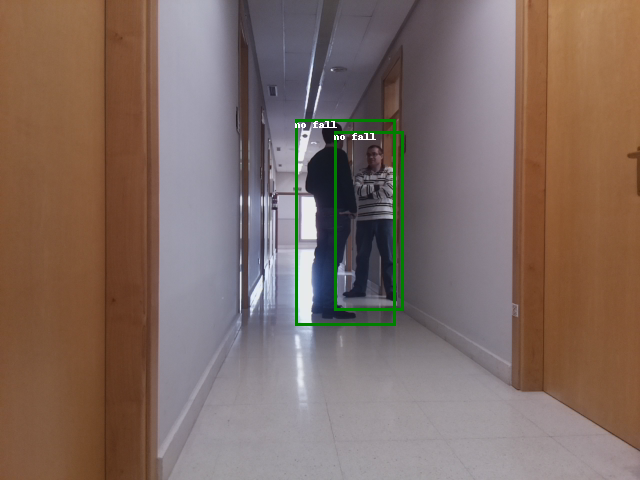

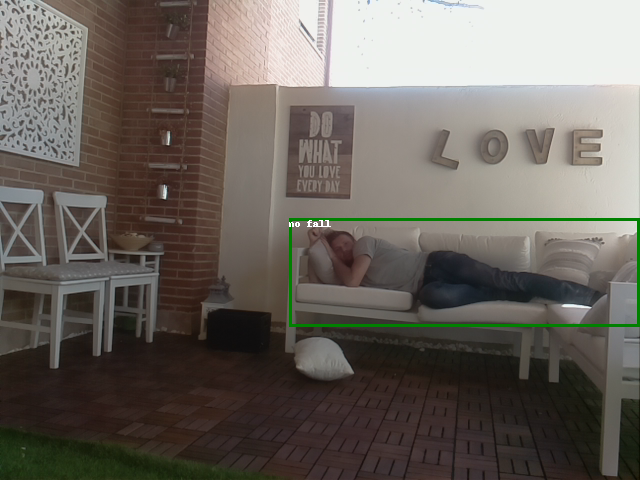

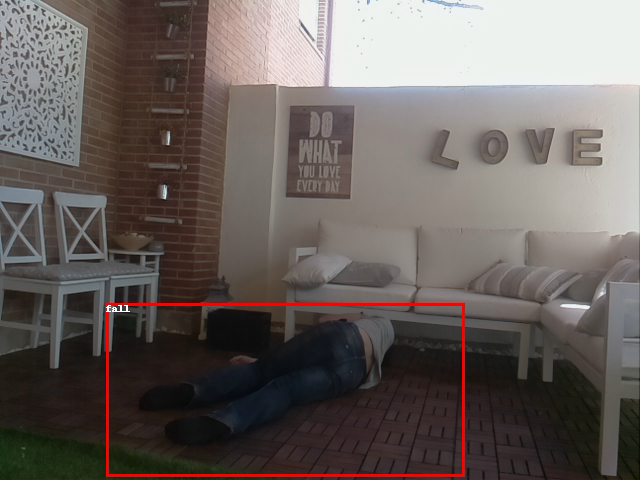

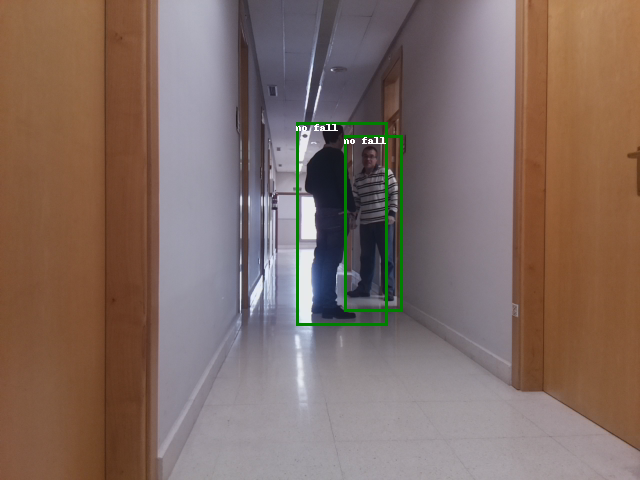

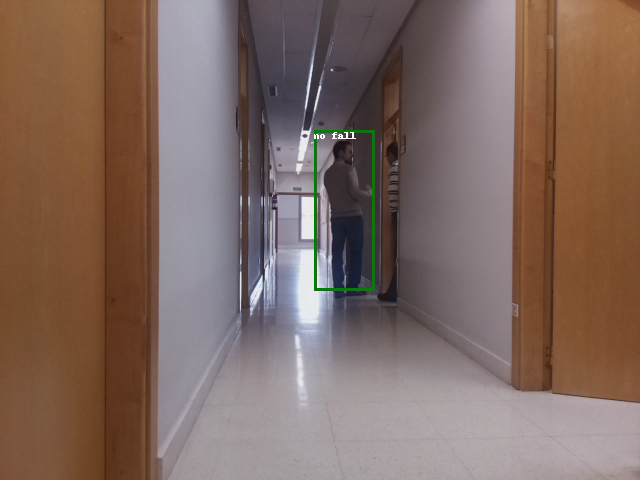

In [6]:
visualize_prediction(test_dataset, test_list, model, device)

In [7]:
lab_gt = [targ['labels'].tolist()[0] for im,targ in test_dataset]

In [8]:
lab_pred = []
for img, target in test_dataset:
    size = len(target['labels'])
    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])
    labels = prediction[0]['labels'].tolist()
    if len(labels)==0:
        lab_pred.append(0)
    else:
        lab_pred.append(labels[:size][0])

In [9]:
f = open(filename("txt","results/"),"a") 

In [10]:
title = "==== TEST RESULT ====\n"
f.write(title)

22

In [11]:
print(f'Length of ground truth labels: {len(lab_gt)}')
print(f'Length of predicted labels: {len(lab_pred)}')
f.write(f'Length of ground truth labels: {len(lab_gt)}\n')
f.write(f'Length of predicted labels: {len(lab_pred)}\n')

Length of ground truth labels: 959
Length of predicted labels: 959


32

In [12]:
m = confusion_matrix(lab_gt, lab_pred)
print(f'The confusion matrix is: {m}')
print( f'The accuracy is: {accuracy_score(lab_gt, lab_pred)}')
f.write(f'The confusion matrix is: {m}\n')
f.write( f'The accuracy is: {accuracy_score(lab_gt, lab_pred)}\n')

The confusion matrix is: [[  0   0   0]
 [ 14 555  29]
 [  0  19 342]]
The accuracy is: 0.935349322210636


35

# TO BINARY CLASSIFICATION

In [13]:
lab_pred_bin = []
for img, target in test_dataset:
    size = len(target['labels'])
    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])
    labels = prediction[0]['labels'].tolist()
    if len(labels)==0:
        lab_pred_bin.append(2)
    else:
        lab_pred_bin.append(labels[:size][0])

In [14]:
m_bin = confusion_matrix(lab_gt, lab_pred_bin)
print(f'The confusion matrix is: {m_bin}')
print( f'The accuracy is: {accuracy_score(lab_gt, lab_pred_bin)}')
f.write(f'The confusion matrix is: {m_bin}\n')
f.write( f'The accuracy is: {accuracy_score(lab_gt, lab_pred_bin)}\n')

The confusion matrix is: [[555  43]
 [ 19 342]]
The accuracy is: 0.935349322210636


35

In [15]:
precision_bin = precision_score(lab_gt, lab_pred_bin)
recall_bin = recall_score(lab_gt, lab_pred_bin)
f1_score_bin = f1_score(lab_gt, lab_pred_bin)

print('The precision is: {:.2f}\nThe recall is: {:.2f}\nThe f1_score is: {:.2f}'.format(precision_bin,recall_bin,f1_score_bin))
f.write('The precision is: {:.2f}\nThe recall is: {:.2f}\nThe f1_score is: {:.2f}\n'.format(precision_bin,recall_bin,f1_score_bin))

The precision is: 0.97
The recall is: 0.93
The f1_score is: 0.95


65

In [16]:
from sklearn import metrics

print(metrics.classification_report(lab_gt,lab_pred_bin))
f.write(f'Sum metrics:\n{metrics.classification_report(lab_gt,lab_pred_bin)}\n')
roc_auc = metrics.roc_auc_score(lab_gt,lab_pred_bin)
print(f'ROC score: {roc_auc}')
f.write(f'ROC score: {roc_auc}\n')

              precision    recall  f1-score   support

           1       0.97      0.93      0.95       598
           2       0.89      0.95      0.92       361

    accuracy                           0.94       959
   macro avg       0.93      0.94      0.93       959
weighted avg       0.94      0.94      0.94       959

ROC score: 0.9377310332687907


30

In [ ]:
# VALIDATION

In [19]:
valid_list = [random.randint(0,len(valid['img_path'].unique())-1) for i in range(5)]

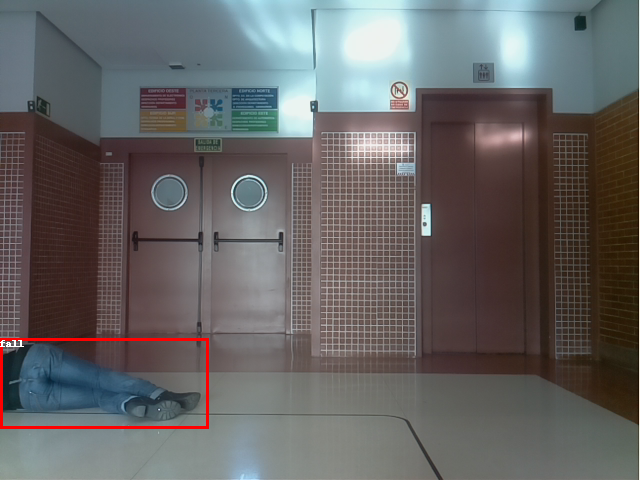

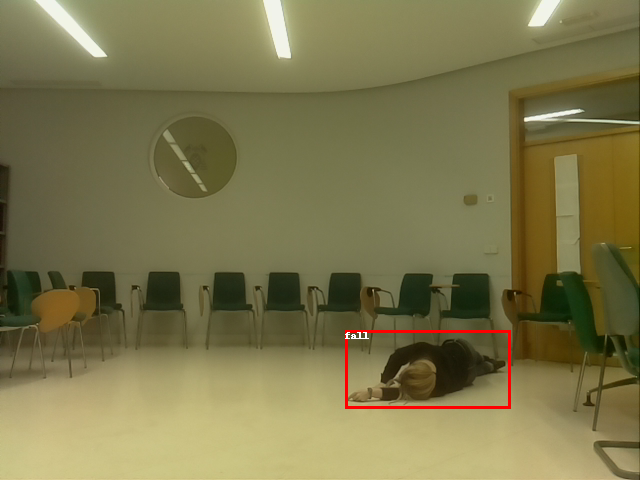

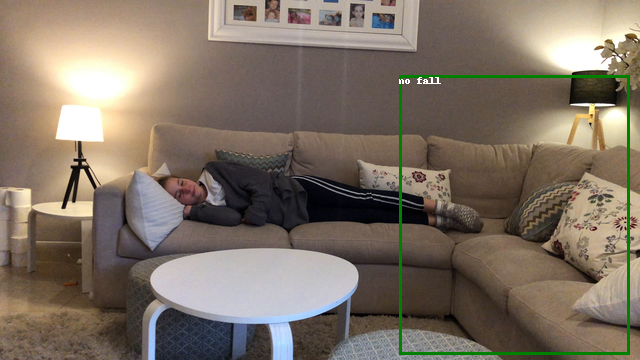

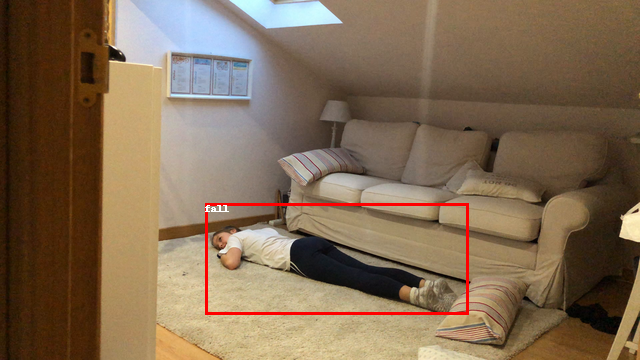

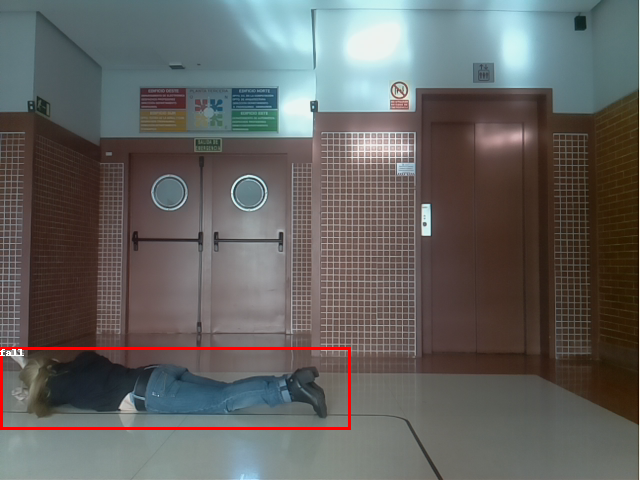

In [20]:
visualize_prediction(valid_dataset, valid_list, model, device)

In [21]:
val_gt = [targ['labels'].tolist()[0] for im,targ in valid_dataset]

In [22]:
val_pred = []
for img, target in valid_dataset:
    size = len(target['labels'])
    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])
    labels = prediction[0]['labels'].tolist()
    if len(labels)==0:
        val_pred.append(0)
    else:
        val_pred.append(labels[:size][0])

In [23]:
title_valid = "==== VALID RESULT ====\n"
f.write(title_valid)

23

In [24]:
print(f'Length of ground truth labels: {len(val_gt)}')
print(f'Length of predicted labels: {len(val_pred)}')
f.write(f'Length of ground truth labels: {len(val_gt)}\n')
f.write(f'Length of predicted labels: {len(val_pred)}\n')

Length of ground truth labels: 1174
Length of predicted labels: 1174


33

In [25]:
m1 = confusion_matrix(val_gt, val_pred)
print(f'The confusion matrix is: {m1}')
print( f'The accuracy is: {accuracy_score(val_gt, val_pred)}')
f.write(f'The confusion matrix is: {m1}\n')
f.write( f'The accuracy is: {accuracy_score(val_gt, val_pred)}\n')

The confusion matrix is: [[330  82]
 [ 59 703]]
The accuracy is: 0.8798977853492334


36

# TO BINARY CLASSIFICATION

In [26]:
val_pred_bin = []
for img, target in valid_dataset:
    size = len(target['labels'])
    model.eval()
    with torch.no_grad():
        prediction = model([img.to(device)])
    labels = prediction[0]['labels'].tolist()
    if len(labels)==0:
        val_pred_bin.append(2)
    else:
        val_pred_bin.append(labels[:size][0])

In [27]:
m1_bin = confusion_matrix(val_gt, val_pred_bin)
print(f'The confusion matrix is: {m1_bin}')
print( f'The accuracy is: {accuracy_score(val_gt, val_pred_bin)}')
f.write(f'The confusion matrix is: {m1_bin}\n')
f.write( f'The accuracy is: {accuracy_score(val_gt, val_pred_bin)}\n')

The confusion matrix is: [[330  82]
 [ 59 703]]
The accuracy is: 0.8798977853492334


36

In [28]:
precision_bin_val = precision_score(val_gt, val_pred_bin)
recall_bin_val = recall_score(val_gt, val_pred_bin)
f1_score_bin_val = f1_score(val_gt, val_pred_bin)

print('The precision is: {:.2f}\nThe recall is: {:.2f}\nThe f1_score is: {:.2f}'.format(precision_bin_val,recall_bin_val,f1_score_bin_val))
f.write('The precision is: {:.2f}\nThe recall is: {:.2f}\nThe f1_score is: {:.2f}\n'.format(precision_bin_val,recall_bin_val,f1_score_bin_val))

The precision is: 0.85
The recall is: 0.80
The f1_score is: 0.82


65

In [29]:
print(metrics.classification_report(val_gt, val_pred_bin))
f.write(f'Sum metrics:\n{metrics.classification_report(val_gt, val_pred_bin)}\n')
roc_auc_valid = metrics.roc_auc_score(val_gt, val_pred_bin)
print(f'ROC score: {roc_auc_valid}')
f.write(f'ROC score: {roc_auc_valid}\n')
f.close()

              precision    recall  f1-score   support

           1       0.85      0.80      0.82       412
           2       0.90      0.92      0.91       762

    accuracy                           0.88      1174
   macro avg       0.87      0.86      0.87      1174
weighted avg       0.88      0.88      0.88      1174

ROC score: 0.8617715261320489
